In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

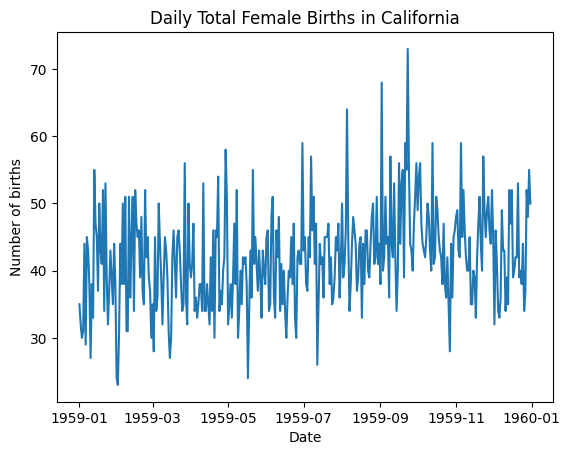

In [ ]:
# Load the dataset
data = pd.read_csv('/content/daily-total-female-births-CA.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
# Plot the time series
plt.plot(data['births'])
plt.title('Daily Total Female Births in California')
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['births'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.808291
p-value: 0.000052


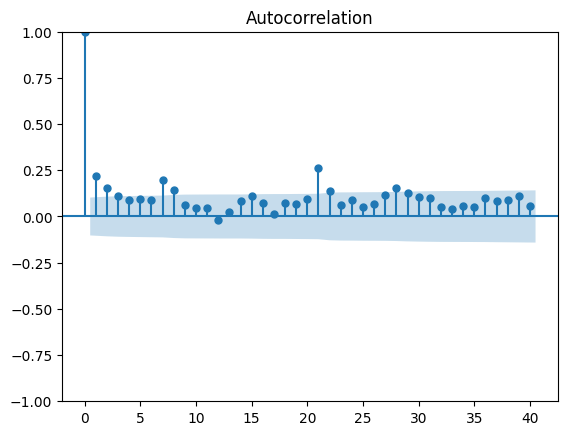

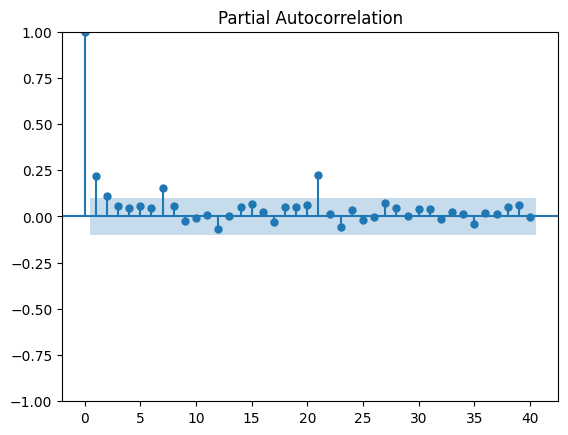

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['births'], lags=40)
plot_pacf(data['births'], lags=40)
plt.show()

In [ ]:
model = ARIMA(data['births'], order=(1, 0, 1))
model_fit = model.fit()

In [ ]:
forecast = model_fit.get_forecast(steps=30)

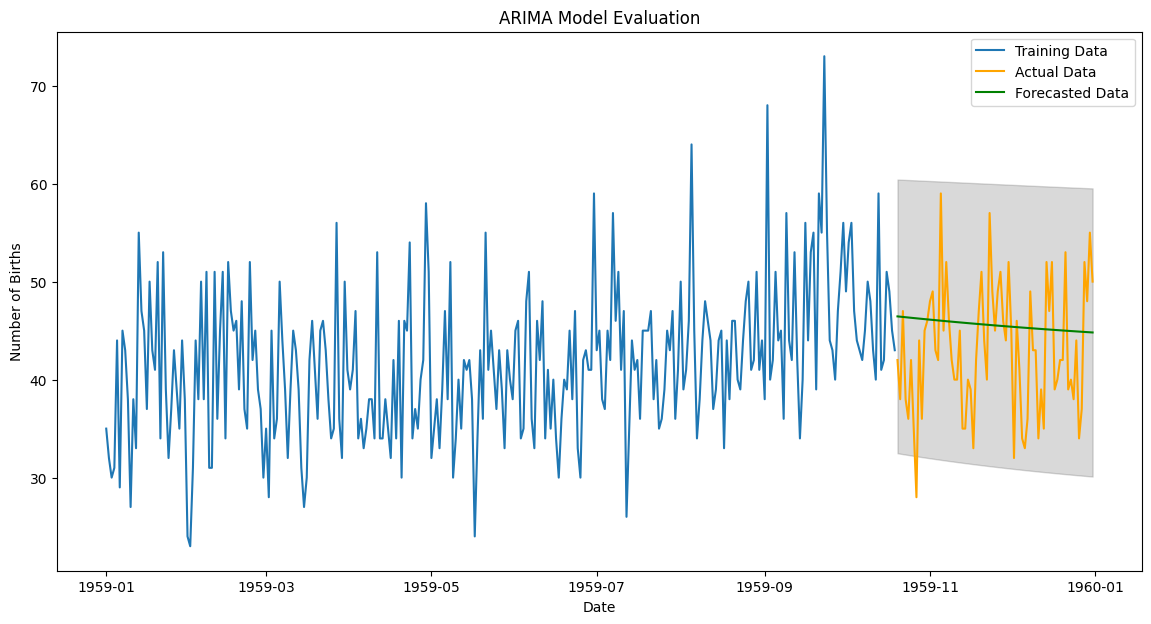

RMSE: 6.97085340106893


In [ ]:
# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['births'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['births'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['births'], label='Training Data')
plt.plot(test['births'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)

#INDIAN EXCHANGE RATE

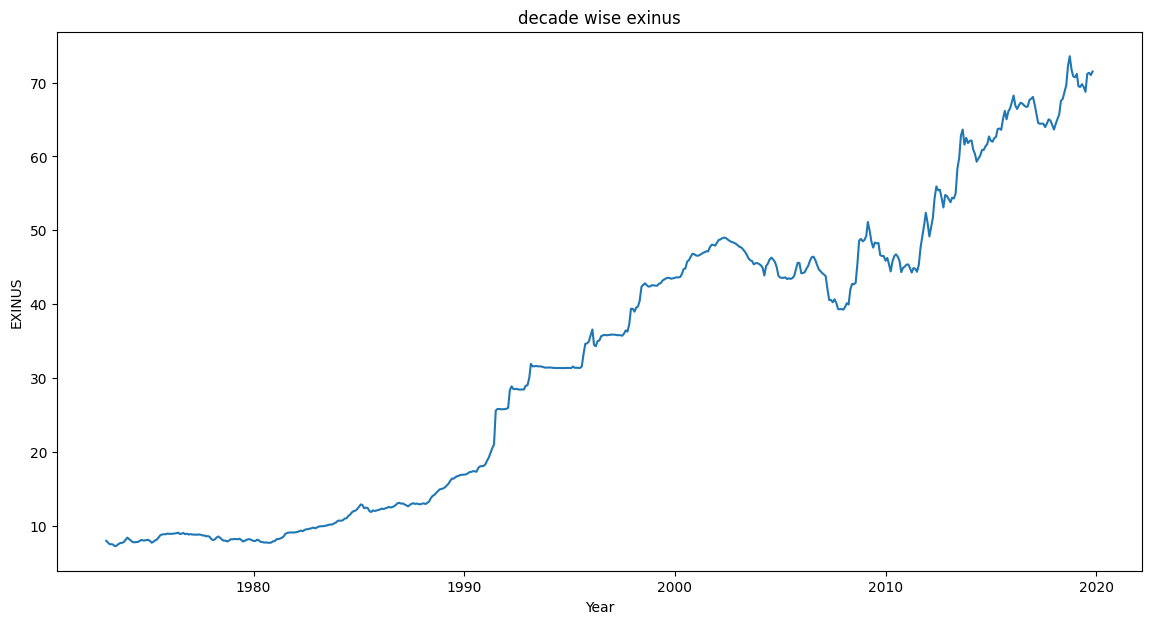

In [ ]:
# Load the dataset
data = pd.read_excel('/content/India_Exchange_Rate_Dataset.xls')
data['date'] = pd.to_datetime(data['observation_date'])
data.set_index('date', inplace=True)
# Plot the time series
plt.figure(figsize=(14,7))
plt.plot(data['EXINUS'])
plt.title('decade wise exinus')
plt.xlabel('Year')
plt.ylabel('EXINUS')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['EXINUS'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.805817
p-value: 0.991729


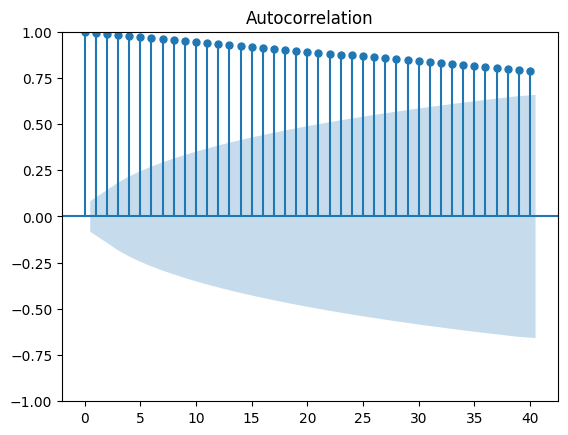

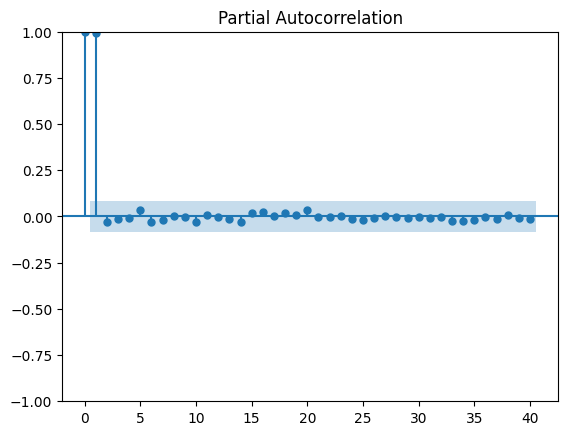

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['EXINUS'], lags=40)
plot_pacf(data['EXINUS'], lags=40)
plt.show()

In [ ]:
model = ARIMA(data['EXINUS'], order=(1, 0, 1))
model_fit = model.fit()

In [ ]:
forecast = model_fit.get_forecast(steps=30)

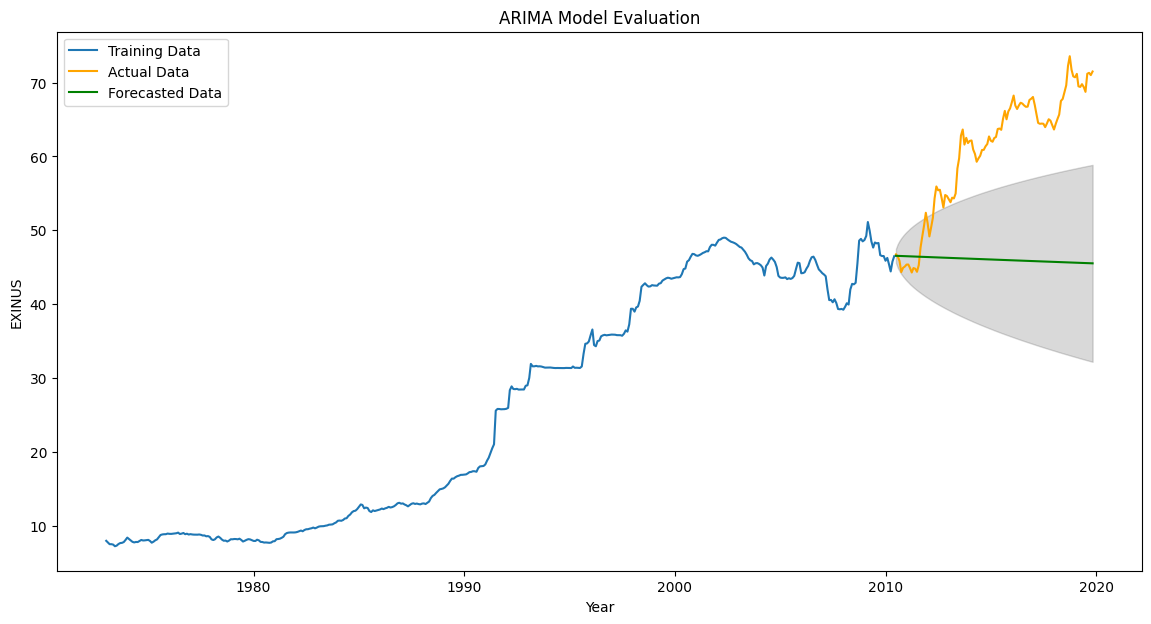

RMSE: 16.915329196597824


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming 'data' is already defined and contains your time series data

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['EXINUS'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Drop NaN values from both actual and forecasted data
valid_index = test_forecast_series.dropna().index.intersection(test['EXINUS'].dropna().index)
mse = mean_squared_error(test['EXINUS'][valid_index], test_forecast_series[valid_index])
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14, 7))
plt.plot(train['EXINUS'], label='Training Data')
plt.plot(test['EXINUS'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Year')
plt.ylabel('EXINUS')
plt.legend()
plt.show()

print('RMSE:', rmse)
